In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [13]:
import random

In [6]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


0


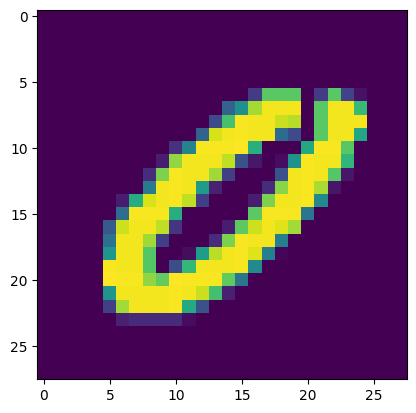

In [21]:
index = int(random.random() * x_train.shape[0])

plt.imshow(x_train[index])
print(y_train[index])

In [20]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [22]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(100).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).shuffle(100).batch(64)

In [46]:
def create_model():
    inputs = tf.keras.Input(shape=(28, 28))
    flattened = tf.keras.layers.Flatten()(inputs)
    dense = tf.keras.layers.Dense(128, activation='relu')(flattened)
    outputs = tf.keras.layers.Dense(10, activation='linear')(dense)
    model = tf.keras.Model(inputs = inputs, outputs = outputs)
    return model

model = create_model()

In [47]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [48]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
optimizer = tf.keras.optimizers.Adam()

In [49]:
model.compile(loss=loss_fn, optimizer=optimizer, metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

In [50]:
history = model.fit(x_train, y_train, batch_size=64, epochs = 100, validation_split=0.2)

Epoch 1/100
750/750 [==============================] - 4s 4ms/step - loss: 2.3012 - sparse_categorical_accuracy: 0.1139 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1060
Epoch 2/100
750/750 [==============================] - 3s 4ms/step - loss: 2.3009 - sparse_categorical_accuracy: 0.1140 - val_loss: 2.3020 - val_sparse_categorical_accuracy: 0.1060
Epoch 3/100
750/750 [==============================] - 3s 4ms/step - loss: 2.3006 - sparse_categorical_accuracy: 0.1140 - val_loss: 2.3011 - val_sparse_categorical_accuracy: 0.1060
Epoch 4/100
750/750 [==============================] - 3s 4ms/step - loss: 2.3000 - sparse_categorical_accuracy: 0.1140 - val_loss: 2.3003 - val_sparse_categorical_accuracy: 0.1060
Epoch 5/100
750/750 [==============================] - 3s 4ms/step - loss: 2.2987 - sparse_categorical_accuracy: 0.1140 - val_loss: 2.2988 - val_sparse_categorical_accuracy: 0.1060
Epoch 6/100
750/750 [==============================] - 3s 4ms/step - loss: 2.2963 - sparse_cate

750/750 [==============================] - 3s 3ms/step - loss: 1.2938 - sparse_categorical_accuracy: 0.5967 - val_loss: 1.2700 - val_sparse_categorical_accuracy: 0.6127
Epoch 47/100
750/750 [==============================] - 3s 3ms/step - loss: 1.2756 - sparse_categorical_accuracy: 0.6015 - val_loss: 1.2514 - val_sparse_categorical_accuracy: 0.6133
Epoch 48/100
750/750 [==============================] - 2s 2ms/step - loss: 1.2584 - sparse_categorical_accuracy: 0.6066 - val_loss: 1.2367 - val_sparse_categorical_accuracy: 0.6342
Epoch 49/100
750/750 [==============================] - 2s 3ms/step - loss: 1.2421 - sparse_categorical_accuracy: 0.6110 - val_loss: 1.2265 - val_sparse_categorical_accuracy: 0.6262
Epoch 50/100
750/750 [==============================] - 2s 3ms/step - loss: 1.2268 - sparse_categorical_accuracy: 0.6165 - val_loss: 1.2020 - val_sparse_categorical_accuracy: 0.6469
Epoch 51/100
750/750 [==============================] - 3s 3ms/step - loss: 1.2107 - sparse_categorical

In [51]:
history = model.fit(x_train, y_train, batch_size=64, epochs = 100, validation_split=0.2)

Epoch 1/100
750/750 [==============================] - 2s 3ms/step - loss: 0.7542 - sparse_categorical_accuracy: 0.7861 - val_loss: 0.7242 - val_sparse_categorical_accuracy: 0.7989
Epoch 2/100
750/750 [==============================] - 2s 3ms/step - loss: 0.7485 - sparse_categorical_accuracy: 0.7878 - val_loss: 0.7175 - val_sparse_categorical_accuracy: 0.8067
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 0.7432 - sparse_categorical_accuracy: 0.7888 - val_loss: 0.7121 - val_sparse_categorical_accuracy: 0.8060
Epoch 4/100
750/750 [==============================] - 3s 3ms/step - loss: 0.7377 - sparse_categorical_accuracy: 0.7896 - val_loss: 0.7089 - val_sparse_categorical_accuracy: 0.8109
Epoch 5/100
750/750 [==============================] - 2s 3ms/step - loss: 0.7327 - sparse_categorical_accuracy: 0.7922 - val_loss: 0.7025 - val_sparse_categorical_accuracy: 0.8037
Epoch 6/100
750/750 [==============================] - 2s 3ms/step - loss: 0.7269 - sparse_cate

750/750 [==============================] - 3s 4ms/step - loss: 0.5746 - sparse_categorical_accuracy: 0.8354 - val_loss: 0.5421 - val_sparse_categorical_accuracy: 0.8480
Epoch 47/100
750/750 [==============================] - 2s 3ms/step - loss: 0.5715 - sparse_categorical_accuracy: 0.8363 - val_loss: 0.5404 - val_sparse_categorical_accuracy: 0.8500
Epoch 48/100
750/750 [==============================] - 3s 4ms/step - loss: 0.5698 - sparse_categorical_accuracy: 0.8366 - val_loss: 0.5389 - val_sparse_categorical_accuracy: 0.8533
Epoch 49/100
750/750 [==============================] - 2s 3ms/step - loss: 0.5662 - sparse_categorical_accuracy: 0.8387 - val_loss: 0.5342 - val_sparse_categorical_accuracy: 0.8523
Epoch 50/100
750/750 [==============================] - 3s 4ms/step - loss: 0.5645 - sparse_categorical_accuracy: 0.8385 - val_loss: 0.5372 - val_sparse_categorical_accuracy: 0.8521
Epoch 51/100
750/750 [==============================] - 3s 3ms/step - loss: 0.5617 - sparse_categorical

In [52]:
history = model.fit(x_train, y_train, batch_size=64, epochs = 50, validation_split=0.2)

Epoch 1/50
750/750 [==============================] - 3s 3ms/step - loss: 0.4702 - sparse_categorical_accuracy: 0.8658 - val_loss: 0.4468 - val_sparse_categorical_accuracy: 0.8732
Epoch 2/50
750/750 [==============================] - 2s 3ms/step - loss: 0.4677 - sparse_categorical_accuracy: 0.8673 - val_loss: 0.4397 - val_sparse_categorical_accuracy: 0.8782
Epoch 3/50
750/750 [==============================] - 2s 3ms/step - loss: 0.4675 - sparse_categorical_accuracy: 0.8674 - val_loss: 0.4393 - val_sparse_categorical_accuracy: 0.8763
Epoch 4/50
750/750 [==============================] - 3s 3ms/step - loss: 0.4664 - sparse_categorical_accuracy: 0.8667 - val_loss: 0.4362 - val_sparse_categorical_accuracy: 0.8776
Epoch 5/50
750/750 [==============================] - 2s 3ms/step - loss: 0.4640 - sparse_categorical_accuracy: 0.8675 - val_loss: 0.4369 - val_sparse_categorical_accuracy: 0.8776
Epoch 6/50
750/750 [==============================] - 2s 3ms/step - loss: 0.4632 - sparse_categorica

In [53]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4021 - sparse_categorical_accuracy: 0.8875


[0.4021332561969757, 0.887499988079071]

In [56]:
model.save('mnist.h5', save_format = 'h5')